#Введение



**В этой тетради мы**

* рассмотрим классическую задачу машинного обучения - предсказание дефолта;
* исследуем, как извлекать различные статистики из данных и анализировать их визуально;
* обучим модели логистической регрессии и решающих деревьев;
* рассмотрим вопрос измерения качества работы обученных
классификаторов;
* узнаем метрику accuracy и посмотрим на ее адекватность в типичных практических кейсах.



---



# Предсказание дефолта по кредитной карте

Люди берут кредит в банке по разным причинам: кто-то готовится к крупным покупкам, кому-то нужна вещь прямо здесь и сейчас, а кто-то просто не хочет стеснять себя в желаниях. В отличие от кредита наличными, кредитная карта имеет ряд преимуществ, таких как возобновляемость лимита, гибкий график погашения и возможность не платить проценты.  

Увы, хороших заемщиков на всех не хватает. Если клиент не в состоянии погасить свою задолженность в сроки, установленные условиями пользования картой, банк считает, что произошел дефолт.

<img src="https://i1.wp.com/blog.bankbazaar.com/wp-content/uploads/2016/03/Surviving-a-Credit-Card-Default.png?w=1000&ssl=1" alt="Drawing" style="width: 50px;" width="480"/>



Предсказание дефолта - одна из первых задач, которую решало машинное обучение в банках. Это **задача бинарной классификации**, результат работы её модели на данных конкретного клиента - предсказать произойдет дефолт или нет.


<img src="https://cashcofinancial.com/wp-content/uploads/2016/12/credit-card-with-sinking-men_fjz5lp8__l.jpg" alt="Drawing" style="width: 50px;" width="360"/>

**Постановка задачи анализа данных**

Целью данной задачи является построение модели **классификации клиентов**: на вход модель будет принимать данные о клиенте, а на выходе она должна работать в двух режимах:
* выдавать вероятность дефолта для данного клиента,
* выдавать правильный с точки зрения модели класс клиента (есть у него дефолт или нет).

**Обзор доступных данных**

Мы будем использовать данные с платформы Kaggle https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset.


В выборке 29163 наблюдений и 25 переменных, одна из которых - целевая.
Таким образом, про каждого из 29163 клиентов мы знаем значения 25 его характеристик: социально демографические характеристики, исторические данные о выплатах по долгам с апреля по август и целевая переменная (был ли дефолт в сентябре).

Выборка была разбита на две части для обучения и для тестирования модели.
В обучающей выборке 21872 клиентов, в тестовой выборке - 7291.

## Доступные признаки

Данные содержат два типа переменных:

* Целевая: **if_default**, наличие дефолта в сентябре
* Остальные переменные: 20 переменных, могут быть использованы для прогноза целевой переменной.

---
| Имя столбца        | Значение |
| :-------------: |:-------------:|
| limit_balance   | Cумма предоставленного кредита |
| sex | Пол (1 - мужской, 2 - женский) |
| education | Уровень образования (1 - магистратура, 2 - бакалавриат, 3 - школа) |
| marriage | Семейное положение (1 - в браке, 2 - одинок) |
| age | Возраст |
| status_april ...  status_august| Статус погашения кредита с апреля по август (-1 - нет долгов, иное, # - задержка платежа на # месяцев)|
| bill_amount_april ... bill_amount_august | Сумма на карте на расчетный период с апреля по август |
| payment_amount_april ... payment_amount_august | Сумма предыдущего платежа на апрель ... на август |
| **if_default** | **Целевая переменная:** дефолт по кредитной карте в сентябре |




---





# План анализа данных

  1. Загрузить данные для обучения;
  2. Обработать данные перед обучением модели;
  3. Обучить модель на обучающей выборке;
  4. Провалидировать модель на тестовой выборке.



---


# Библиотеки для анализа данных в Python.


<img src="https://storage.ning.com/topology/rest/1.0/file/get/1157930838?profile=RESIZE_710x" alt="Drawing" style="width: 50px;" width="620"/>


Библиотека – это сборник подпрограмм или объектов, используемых для разработки. На языке Python есть огромное количество библиотек под самые разные задачи. Мы остановимся на рассмотрении основных: Numpy, Pandas, Maplotlib, Scikit-learn.



## 1.1 Загружаем библиотеки

За работу с табличными данными (Excel, CSV и т.д.) отвечает библиотека **pandas**. В ней реализованы функции для считывания и сохранения таких данных, легкой работы со структурой данных, а также для проведения простой аналитики.


<img src="https://files.realpython.com/media/A-Guide-to-Pandas-Dataframes_Watermarked.7330c8fd51bb.jpg" alt="Drawing" style="width: 50px;" width="480"/>

Чтобы загрузить библиотеку для работы, нужно написать

```
import имя_библиотеки as короткое_имя_библиотеки
```



In [ ]:
import pandas as pd

Для работы с двумерной и трехмерной графикой есть библиотека **matplotlib**. Графики используются для облегчения интерпретации полученных результатов, а также в качестве иллюстраций в презентациях и отчетах.

<img src="https://miro.medium.com/max/764/1*yBpmB6giu2CcMQ5g__f8dg.png" alt="Drawing" style="width: 50px;" width="360"/>


In [ ]:
import matplotlib.pyplot as plt

#магическая команда, указывает, что графики нужно строить прямо в ноутбуке:
%matplotlib inline


---


# Часть 1. Работа с данными в Pandas и Matplotlib.

## 1.2 Загрузим данные и посмотрим на них

Данные, которые мы будем использовать для решения задачи, состоят из двух частей: часть для обучения и часть для тестирования модели.

Для работы с данными в Colab их нужно загрузить с помощью команды !wget. Для того, чтобы игнорировать сообщения в процессе загрузки, используем магическую команду %%capture в первой строке.

In [ ]:
#так нужно делать только в Google Colab
%%capture
!wget https://www.dropbox.com/s/ryq2xsa4k7ztxuv/training_data.csv
!wget https://www.dropbox.com/s/n914mymnzybexox/test_data.csv

Наши данные в формате `csv` - comma separated values, то есть значения, разделенные запятой. Обычно data scientists работают с табличными данными, которые представлены именно в таком виде. Чтобы загрузить такие данные, будем использовать функцию **`pd.read_csv()`** из библиотеки `pandas`.  В функцию передаем один **атрибут**: название файла с данными в виде таблицы.

In [ ]:
training_data = pd.read_csv('training_data.csv')
test_data = pd.read_csv('test_data.csv')

В качестве результата мы получаем специальный объект библиотеки pandas `DataFrame`.

*Что важно посмотреть, после того, как мы загрузили данные?*
- проверить, что они действительно загрузились
- визуально посмотреть на данные, чтобы удостовериться, что данные правильные: колонки имеют те же названия, что и в таблице и т.д.

Для того, чтобы это сделать, нужно вызвать от переменной training_data **метод** ```head()```, который выводит первые 5 строк таблицы.

*Замечание:* Для вызова метода объекта необходимо сначала написать имя объекта, затем поставить точку, затем уже написать название метода. Обратите внимание, что в конце обязательно ставить скобки, потому что метод - это функция и в ней есть аргументы, просто в данном случае мы их не передаем, поэтому оставляем поле пустым.

In [ ]:
training_data.head()

,limit_balance,sex,education,marriage,age,status_august,status_july,status_june,status_may,status_april,...,bill_amount_july,bill_amount_june,bill_amount_may,bill_amount_april,payment_amount_august,payment_amount_july,payment_amount_june,payment_amount_may,payment_amount_april,if_default
0,60000,2,2,1,40,2,2,0,0,0,...,56363,47940,30134,31144,0,3000,1083,1500,1500,0
1,230000,2,2,1,37,0,0,0,0,0,...,16884,17620,18353,18901,1300,1001,1000,1000,1000,0
2,20000,2,2,2,22,2,0,0,0,3,...,7872,9077,10989,10529,1500,1500,2225,0,0,1
3,150000,2,1,2,29,0,0,0,0,0,...,53030,65006,50515,0,16000,12376,1109,0,0,0
4,150000,1,3,1,49,0,0,0,0,0,...,36772,4521,6452,6742,3000,3000,2000,378,3306,0


Посмотрим общую информацию о данных. Для того, чтобы это сделать, нужно вызвать у переменной *training_data* метод **info()**. Метод info() позволяет сделать две вещи одновременно: посмотреть, с какими типами данных мы работаем и проверить, есть ли пропуски в них.

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21872 entries, 0 to 21871
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   limit_balance          21872 non-null  int64
 1   sex                    21872 non-null  int64
 2   education              21872 non-null  int64
 3   marriage               21872 non-null  int64
 4   age                    21872 non-null  int64
 5   status_august          21872 non-null  int64
 6   status_july            21872 non-null  int64
 7   status_june            21872 non-null  int64
 8   status_may             21872 non-null  int64
 9   status_april           21872 non-null  int64
 10  bill_amount_august     21872 non-null  int64
 11  bill_amount_july       21872 non-null  int64
 12  bill_amount_june       21872 non-null  int64
 13  bill_amount_may        21872 non-null  int64
 14  bill_amount_april      21872 non-null  int64
 15  payment_amount_august  21872 non-nul

*Анализируем результат выполнения команды*:

В данных присутствует всего один тип столбцов dtypes: int64 - целое число.

Для каждого признака количество non-null объектов соответствует размеру таблички 21872, значит пропусков нет.

Посмотрим на данные третьим способом, а именно построим гистограмму с помощью метода `hist()`. В качестве атрибута передаем размер желаемой картинки `figsize=(14,12)`.

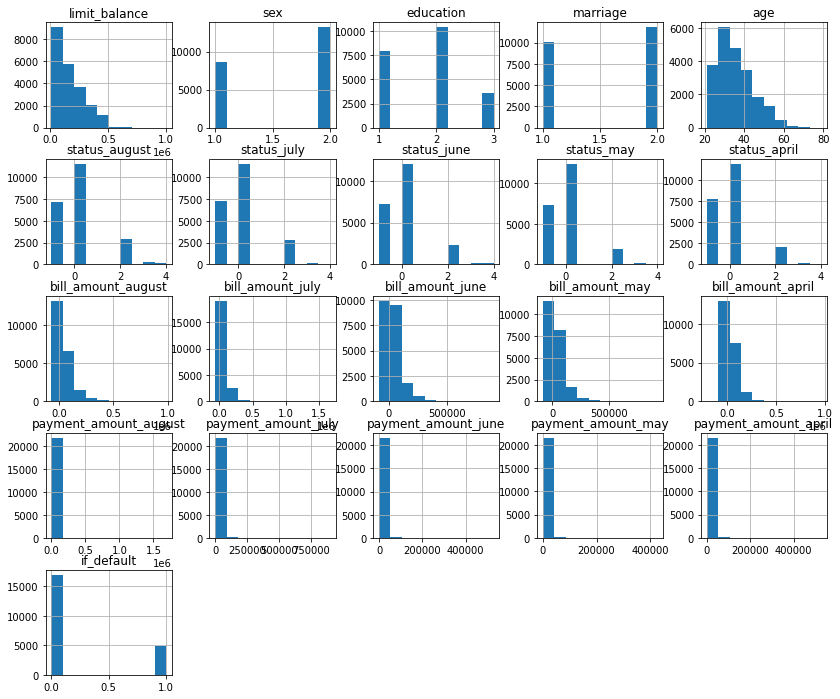

In [ ]:
training_data.hist(figsize=(14, 12));

*Что видно на картинке?*

Среди признаков
* 3 являются **бинарными**:  marriage, sex, if_deafault;
* 5 являются **категориальными**: education, status_april, status_may, status_june, status_july, status_august;
* 12 являются **количественными**.

*Напоминание*:
* бинарные признаки - это признаки, которые могут принимать только два значения, например, пол.   
* категориальные признаки - это такие признаки, которые определяют факт принадлежности объекта к некоторой категории. Например, уровень образования у человека, цвет у машины, семейство у животных и т.д.
* количественные признаки - это признаки, которые не являются бинарными или категориальными :)

### Индексация и извлечение данных

Для извлечения отдельного столбца можно использовать конструкцию вида `DataFrame['Name']` или `DataFrame.Name`.

Посмотрим на соотношение людей с дефолтом и без него. Для этого используем метод `value_counts()`, который показывает, сколько каждого вида значений имеется в выборке.


In [ ]:
training_data['if_default'].value_counts()

0    17006
1     4866
Name: if_default, dtype: int64

Изобразим графически с помощью столбчатой диаграммы. Для этого у полученного результата вызываем метод `plot()` и передаем в качестве атрибута `kind='bar'`.

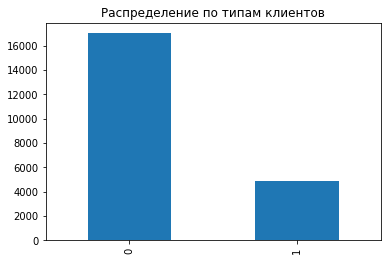

In [ ]:
training_data['if_default'].value_counts().plot(kind='bar')
plt.title('Распределение по типам клиентов');

Также можно использовать логическую индексацию DataFrame. Посмотрим на примере: какой максимальный лимит по карте был предоставлен среди пользователей, не вернувших кредит?

Условие для этой задачи будет выглядеть следующим образом:
`training_data['if_default'] == 1`. Максимум ищем с помощью метода max().

In [ ]:
training_data[training_data['if_default'] == 1]['limit_balance'].max()

740000

Получается, что из данных выбирается та часть, которая удовлетворяет заданному условию, и уже по ней ищется максимум.

#### **Упражнение.** Найдите медианный возраст группы людей, состоящих в браке. Сравните его с медианным возрастом одиноких людей. Медиану ищем с помощью метода `median()`.


*Напоминание:* Квантиль - это значение, которое заданная случайная величина не превышает с фиксированной вероятностью. $\alpha$-квантиль - это такое число $x_\alpha$, которое удовлетворяет $\mathbf{P}(X \geq x_\alpha) \leq \alpha$. Медиана - это 50% квантиль.

In [ ]:
training_data[training_data['marriage'] == 1]['age'].median()

39.0

### Группировка данных и много визуального анализа

Иногда необходимо смотреть на распределение данных по группам, для этого в `pandas` есть группировка. В общем случае группировка выглядит следующим образом:

```
data.groupby(by=имя_колонки_по_которой_группируем).функция_которую_применяем()
```

Посмотрим на общую статистику по возрасту клиентов, но в зависимости от значения целевой переменной. Для отображения общей статистики данных используется функция `describe()`.

In [ ]:
training_data.groupby(by='if_default')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
if_default,,,,,,,,
0,17006.0,35.362343,9.058980,21.0,28.0,34.0,41.0,79.0
1,4866.0,35.673243,9.700748,21.0,28.0,34.0,42.0,75.0


Видим, что средний возраст по обеим группам примерно одинаков. То же самое можно сделать и визуально, с помощью инструмента "ящик с усами". Ящик с усами - это компактное отображение распределения данных. Сам ящик ограничен минимальным и максимальным значениями выборки, линия внутри - это медиана, а вне ящика показаны выбросы.


Посмотрим на распределение параметра limit_balance. Для этого используем метод `boxplot()`, в качестве атрибутов подается `column='limit_balance'` (признак, который смотрим), `by='if_default'boxplot` (признак, по которому группируем). Также указываем `figsize=(10,6)`, чтобы отображалось красиво.

<AxesSubplot:title={'center':'limit_balance'}, xlabel='if_default'>

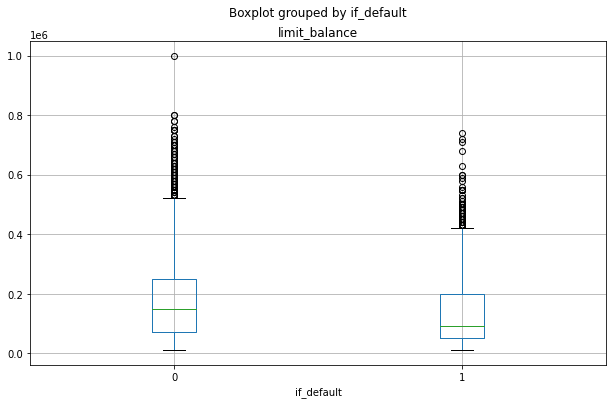

In [ ]:
training_data.boxplot(figsize=(10,6), column='limit_balance', by='if_default')

*Обратите внимание, что масштаб оси OY 1e6*.

Получается, что лимит тех, кто не вернул кредит в среднем меньше, чем лимит тех, кто его вернул. Это видно по зеленым линиям - медианам. Возможно, банк изначально закладывал "ненадежность" клиента в лимит.  

Посмотрим на гистограммы категориальных признаков marriage и education в зависимости от целевой переменной. Для этого используем метод hist() с теми же атрибутами, что и у метода `boxplot()`. Единственное отличие - так как в наших данных разное количество клиентов в каждой группе, мы хотим сравнивать относительные величины. Устанавливаем `density=True` и получаем одинаковый масштаб в обеих гистограммах.

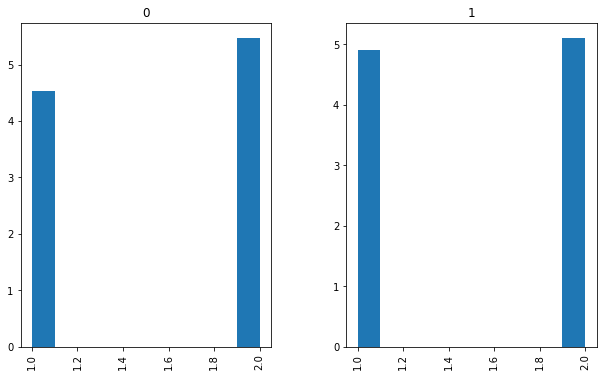

In [ ]:
training_data.hist(figsize=(10,6), column='marriage', by='if_default', density=True);

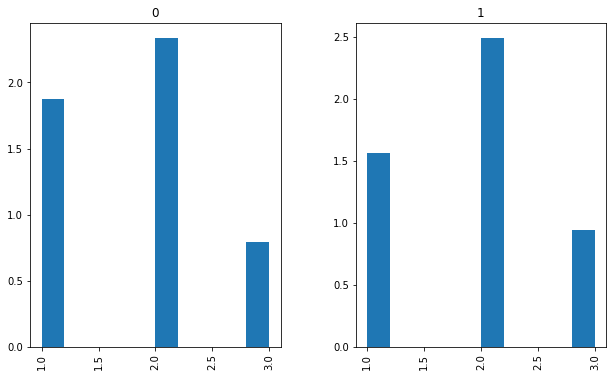

In [ ]:
training_data.hist(figsize=(10,6), column='education', by='if_default', density=True);

Одинокие люди немного чаще не возвращают кредит. Люди с законченной магистратурой, наоборот, чаще долги возвращают.

**Упражнение.** Посмотрите на распределения апрельских статусов клиентов (переменная status_april) в зависимости от целевой переменной. Какой можно сделать вывод?


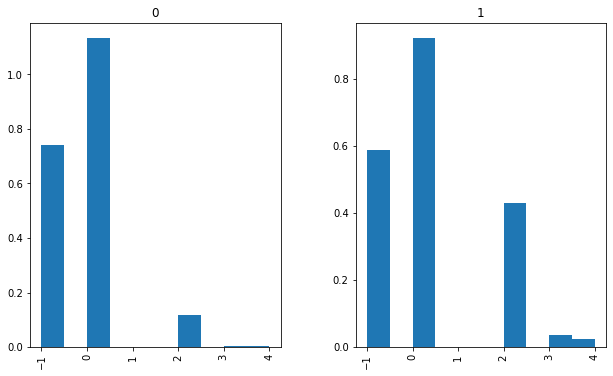

In [ ]:
training_data.hist(figsize=(10,6), column='status_april', by='if_default', density=True);

Методы визуализации, которые мы использовали выше (`hist()`, `plot()`, `boxplot()`), основаны на методах из библиотеки **Matplotlib**, но используют их неявно. С одной стороны, благодаря этому мы можем не беспокоиться о том, как аккуратно передать данные в функции, но, с другой стороны, это ограничивает возможности настройки графиков.

Посмотрим на то, какие параметры можно настраивать в методах **Matplotlib** непосредственно.

Проанализируем изменение средних выплат с апреля по май (параметры payment_amount_month).

In [ ]:
mean_amount_payment = training_data[['payment_amount_april', 'payment_amount_may', 'payment_amount_june',
                                     'payment_amount_july', 'payment_amount_august']].mean()

mean_amount_payment

payment_amount_april     5080.619514
payment_amount_may       4884.322970
payment_amount_june      4883.891688
payment_amount_july      5070.449387
payment_amount_august    5960.041971
dtype: float64


Основная функция, которая нам нужна - `plot()`. Если ей на вход передать один список, то значения из этого списка будут отложены по оси ординат, а по оси абсцисс будут отложены индексы элементов массива.

*Комментарий:* чтобы задать значения по обеим осям необходимо в `plot()` передать два списка с x-координатами и y-координатами соответственно.

Полезные методы:
* title() - настраивает заголовок графика;
* xticks(), yticks() - настраивают метки осей;
* xlabel(), ylabel() - настраивают подписи к осям (не путать с метками!);
* legend() - включает легенду;
* grid() - включает сетку.



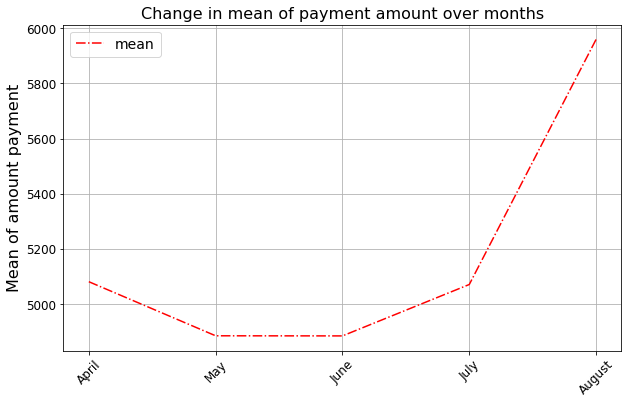

In [ ]:
# инициализируем фигуру и указываем ее размер
plt.figure(figsize=(10, 6))

# название графика
plt.title('Change in mean of payment amount over months', fontsize=16)

# строим график
plt.plot(mean_amount_payment, color='red', linestyle='-.', label='mean')

# настраиваем метки осей
plt.xticks(ticks=[0, 1, 2, 3, 4],
           labels=('April', 'May', 'June', 'July', 'August'),
           rotation=45, fontsize=12);
plt.yticks(fontsize=12);

# настраиваем подписи осей
plt.ylabel('Mean of amount payment', fontsize=16)

# включаем легенду и сетку
plt.legend(fontsize=14)
plt.grid()

**Промежуточные выводы по первичному анализу данных**

* Задача несбалансирована: людей, оплативших долг намного больше.
* Из соц.-дем. характеристик возраст выглядит наименее значимым для построения модели.
* Распределения семейного положения и уровня образования отличаются между группами "дефолтных" и "не дефолтных" клиентов.
* Доступные лимиты по картам существенно различаются между группами.

<a target="_blank"><img src="https://pbs.twimg.com/media/DctMkmjXUAY8I7P.jpg"
alt="IMAGE ALT TEXT HERE" width="620" border="0" /></a>




---



# Часть 2. Обучение и тестирование модели.

После того, как мы загрузили данные, посмотрели на них глазами, сделали какие-то выводы, можно переходить непосредственно к машинному обучению.



In [ ]:
training_data.head(10)

,limit_balance,sex,education,marriage,age,status_august,status_july,status_june,status_may,status_april,...,bill_amount_july,bill_amount_june,bill_amount_may,bill_amount_april,payment_amount_august,payment_amount_july,payment_amount_june,payment_amount_may,payment_amount_april,if_default
0,60000,2,2,1,40,2,2,0,0,0,...,56363,47940,30134,31144,0,3000,1083,1500,1500,0
1,230000,2,2,1,37,0,0,0,0,0,...,16884,17620,18353,18901,1300,1001,1000,1000,1000,0
2,20000,2,2,2,22,2,0,0,0,3,...,7872,9077,10989,10529,1500,1500,2225,0,0,1
3,150000,2,1,2,29,0,0,0,0,0,...,53030,65006,50515,0,16000,12376,1109,0,0,0
4,150000,1,3,1,49,0,0,0,0,0,...,36772,4521,6452,6742,3000,3000,2000,378,3306,0
5,290000,2,1,1,36,-1,-1,-1,-1,-1,...,4536,6074,0,817,4538,6074,0,817,1662,0
6,30000,1,2,1,30,0,0,0,0,0,...,28998,29480,29500,0,2000,1200,1000,0,1500,0
7,50000,2,1,2,53,0,0,0,0,0,...,50321,20141,18039,19349,2059,666,1000,2008,1513,0
8,400000,2,1,1,28,-1,2,0,0,0,...,391178,392932,394410,410127,0,14000,13560,28000,0,0
9,200000,1,1,2,34,-1,-1,-1,-1,-1,...,-8,2315,4255,2010,326,2323,4264,2028,1857,0


In [ ]:
test_data.head()

,limit_balance,sex,education,marriage,age,status_august,status_july,status_june,status_may,status_april,...,bill_amount_july,bill_amount_june,bill_amount_may,bill_amount_april,payment_amount_august,payment_amount_july,payment_amount_june,payment_amount_may,payment_amount_april,if_default
0,130000,2,2,2,22,0,0,0,0,0,...,10341,9788,7193,9006,2000,2290,1005,4078,713,0
1,160000,2,2,1,38,0,0,0,2,2,...,109731,116452,114481,121885,4002,8565,0,9502,0,0
2,180000,2,1,2,25,-1,-1,-1,-1,-1,...,-632,-632,-632,-632,0,0,0,0,0,0
3,210000,2,2,2,37,0,0,0,0,0,...,44624,43339,44245,45125,15000,1552,1605,1615,1698,0
4,600000,2,3,2,51,0,0,0,0,0,...,147559,323129,310042,311840,85113,217035,11032,15019,10033,0


## 2.Подготовка данных для обучения и тестирования. Работаем с целевой переменной

*Какая переменная целевая?*

В данном случае по условию задачи мы должны прогнозировать дефолт, поэтому целевая переменная - это наличие дефолта, **if_default**.

Нам нужно выделить в отдельную переменную столбец из нашей таблицы, который соответствует определенной выше целевой переменной.

Для этого мы у таблицы `training_data` в квадратных скобках указываем имя нужного столбца.

In [ ]:
training_values = training_data['if_default']

Проверим размерность целевой переменной. Это можно сделать с помощью метода `shape`:

In [ ]:
training_values.shape

(21872,)

Запись `(21872,)` равносильна `(21872, 1)`.  Она означает, что у нас 21872 столбцов (экземпляров в выборке) и 1 колонка (признак)

Отделим входные переменные от целевой, чтобы можно было построить модель предсказания целевой переменной по входным.


Для это нужно будем использовать метод ```drop()```.

Обратите внимание, что в данном случае мы передаем два аргумента:
* target_variable_name - название столбца цены, который мы ранее записали в эту переменную и теперь хотим удалить из training_data
* axis=1 - означает, что мы удаляем столбец, а в случае axis=0 - означает, что мы удаляем строку

In [ ]:
training_points = training_data.drop('if_default', axis=1)

Можно посмотреть результаты этих действий с помощью ```head()``` и ```shape```, которыми мы пользовались ранее,  но сейчас нужно вызывать их от новых переменных.

In [ ]:
training_points.tail()

,limit_balance,sex,education,marriage,age,status_august,status_july,status_june,status_may,status_april,bill_amount_august,bill_amount_july,bill_amount_june,bill_amount_may,bill_amount_april,payment_amount_august,payment_amount_july,payment_amount_june,payment_amount_may,payment_amount_april
21867,230000,2,1,1,30,0,0,0,0,0,5142,5305,5661,3935,4460,3116,1000,2000,2000,2000
21868,290000,1,1,2,35,-1,-1,-1,-1,-1,118701,97606,76053,53994,31812,3400,2588,1696,1113,1647
21869,310000,1,1,2,30,-1,-1,-1,-1,-1,1648,1284,1088,892,-304,1000,1000,1000,304,39544
21870,300000,2,1,2,45,0,0,0,0,0,124057,125120,133997,118000,131067,10048,20172,11034,20109,30428
21871,780000,1,1,1,48,0,0,0,0,0,178587,190663,195124,184872,191090,15004,10000,8000,10028,7003


In [ ]:
training_points.shape

(21872, 20)

Видно, что столбца действительно нет, а количество строк не изменилось.

####**Упражнение**. По аналогии подготовьте тестовую выборку. Не забудьте проверить, что все получилось правильно.



In [ ]:
test_values = test_data['if_default']
test_points = test_data.drop('if_default',
                             axis=1)

print(test_points.shape)


(7291, 20)


In [ ]:
print(test_values.shape)

(7291,)


<a target="_blank"><img src="https://1.bp.blogspot.com/-Sk5yumiKjAQ/XO4S7ocnHXI/AAAAAAAADCA/mw_XfK7ICdgr_NjzR1h8e8PJ1k7Gg3mGwCLcBGAs/s1600/programing-ml.png"
alt="IMAGE ALT TEXT HERE" width="620" border="0" /></a>

## 3.1. Выбираем метод, который будем использовать

Проще всего начать с простых методов.
Мы воспользуемся двумя методами для построения моделей и сравним их между собой:
* Логистическая регрессия *logistic regression*
* Лес решающих деревьев *random forest*

Логистическая регрессия - "адаптация" линейной регрессии для решения задачи классификации. Она принадлежит к классу обобщенных линейных моделей.

На выбор метода для построения модели влияет набор признаков, размер выборки, интуиция про то, какая связь между входными переменными и целевой. Но часто решение принимается исходя из того, какая модель сработала лучше.

Библиотека **scikit-learn** де факто наиболее популярный, разносторонний, хорошо документированный и постоянно обогащающийся инструмент для построения моделей машинного обучения.

<a target="_blank"><img src="https://neurohive.io/wp-content/uploads/2019/06/1200px-Scikit_learn_logo_small.svg.png"
alt="IMAGE ALT TEXT HERE" width="360" border="0" /></a>


Мы импортируем два модуля из этой библиотеки:
* linear_model - тут находятся все линейные модели и обобщенные линейные модели, в том числе модель логистической регрессии.
* ensemble - тут находятся модели на основе ансамблей


In [ ]:
from sklearn import linear_model, ensemble

**Sklearn** всем хорош, но он печатает много различных предупреждений в процессе работы.

Библиотека warnings отвечает за то, какие предупреждения о работе будут выводиться пользователю. FutureWarning - предупреждения о том, как изменится работа библиотек в будущих версиях.

Включим режим игнорирования таких предупреждений. Это делается вызовом функции simplefilter() c задание двух атрибутов: действия action и категории предупреждений category.

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Прежде чем начать делать ремонт, нужно подготовить инструменты для работы. Аналогично в нашем случае, прежде чем обучать модели, нужно создать их прототипы.

Чтобы создать модель логистической регрессии, пишем имя модуля `linear_model`, затем точку, затем название модели.

Для этого нужно выполнить следующий код:

```python
logistic_regression_model = linear_model.LogisticRegression()
logistic_regression_model
```

Результат выполнения должен быть следующим:

```python
LogisticRegression(C=1.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='warn', n_jobs=None,
          penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
```

In [ ]:
logistic_regression_model = linear_model.LogisticRegression() # создаем модель
logistic_regression_model # смотрим, что получилось

LogisticRegression()

In [ ]:
?linear_model.LogisticRegression()

Object `linear_model.LogisticRegression()` not found.


По аналогии создаем модель случайного леса auto`RandomForestClassifier()` из модуля `ensemble`.

Для этого нужно выполнить следующий код:

```python
random_forest_model = ensemble.RandomForestClassifier()
random_forest_model
```

Результат выполнения должен быть следующим:
    
```python
RandomForestClassifier(bootstrap=True, class_weight=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn',
            n_jobs=None, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
```

В качестве атрибутов передаем параметр `n_estimators=100`.

In [ ]:
random_forest_model = ensemble.RandomForestClassifier(n_estimators=100, random_state=123)
random_forest_model

RandomForestClassifier(random_state=123)

У модели классификации на основе случайного леса больше **гиперпараметров**,чем у логистической регрессии. Рассмотрим наиболее важные:
* гиперпараметр **n_estimators** определяет, сколько деревьев в лесу,
* в гиперпараметре **max_depth** устанавливается, какая максимальная глубина у дерева,
* в гиперпараметре **min_samples_leaf** задается, какое минимальное число объектов может попасть в лист дерева.


*Замечание:* Конкретные значения оказывают влияние на время обучения: например, чем больше деревьев в лесе - тем больше время обучения. Чем больше параметров у модели, тем дольше она обучается.

## 3.2. Обучить модель

Теперь, когда мы создали прототипы обеих моделей, можем их обучить с помощью обучающей выборки.

Для этого вызываем метод ```fit()``` у модели и передаем ему на вход два аргумента: таблицу входных признаков и столбец значений целевой переменной - (training_points, training_values)

In [ ]:
logistic_regression_model.fit(training_points, training_values)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Делаем тоже самое для модели решающего леса.

In [ ]:
random_forest_model.fit(training_points, training_values)

RandomForestClassifier(random_state=123)

* Для двух разных моделей в sklearn методы для обучения модели не отличаются.
* Мы получили две обученные модели.
* Теперь необходимо провалидировать модели на новых тестовых данных, которые не использовались при обучении модели.

# 4.Провалидировать модель на тестовой выборке

<img src="https://drive.google.com/uc?id=1QbHrix_UrbD77BmIGiitiaH8nB8UdUmj" alt="Drawing" style="width: 400px;"/>


Сначала получим прогноз модели на тестовых данных `test_points` с помощью моделей логистической регрессии и решающего леса.
Для этого для обеих моделей запустим метод `predict()`.

In [ ]:
test_predictions_logistic_regression = logistic_regression_model.predict(test_points)

In [ ]:
test_predictions_logistic_regression.shape == test_values.shape

True

In [ ]:
test_predictions_random_forest = random_forest_model.predict(test_points)

In [ ]:
test_predictions_random_forest

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
test_predictions_random_forest.shape == test_values.shape

True

**Упражнение.** Посмотрите, сколько предсказаний каждого вида (дефолтов и возвратов кредитов) спрогнозировали модели. Подсказка: количество единичек-дефолтов можно посчитать, просуммировав все значения в массиве предсказанных меток с помощью метода `sum()`. Количество не-дефолтов - это длина массива минус количество дефолтов. Для получения длины массива используйте функцию `len(массив)` или метод `массив.shape[0]`.

*Подсказка:* замените в коде ниже #YOUR_CODE_HERE на правильные значения.

In [ ]:
print(sum(test_predictions_random_forest))
print(len(test_predictions_random_forest) - sum(test_predictions_random_forest))

836
6455


**Шаг 5.1. Считаем точность прогноза**

Естественный способ измерить качество модели - посчитать долю правильных предсказаний, то есть, сколько в процентном соотношении от размера тестовой выборки модель угадала единичек и сколько угадала ноликов. Такая метрика называется точность (accuracy).

<img src="https://drive.google.com/uc?id=1ITTp5pCtDKszhkkLXzXiuCWi09VJaioA" alt="Drawing" style="width: 600px;"/>

Функция для подсчета точности реализована в библиотеке **sklearn** и называется **`accuracy_score()`**. Импортируем её.

In [ ]:
from sklearn.metrics import accuracy_score

В функцию **`accuracy_score()`** необходимо передать два аргумента:
* истинные значения меток - *test_values*
* предсказания модели - *test_predictions_logistic_regression* или *test_predictions_random_forest*

In [ ]:
print(accuracy_score(test_values, test_predictions_logistic_regression))
print(accuracy_score(test_values, test_predictions_random_forest))

0.7739679056370868
0.7970100123439857


**Как понять, хорошо работает модель или нет?**

Из значения точности мы никак не можем понять, сколько меток каждого класса правильно предсказала модель. В нашей задаче мало значений с классом 1 (дефолт), но много 0 (возврат долга). Может быть такая ситуация, когда модель очень хорошо научилась выделять характеристики большого класса, в нашем случае 0, но совсем не умеет выделять характеристики маленького класса. А часто именно последние в большей степени интересуют аналитиков.

Самый простой способ проверить - это сравнить значения точности для наших моделей с точностью для константного классификатора, модели, которая всегда бы предсказывала больший класс, в нашем случае 0.
Для этого можно в функцию `accuracy_score()` в качестве второго аргумента передать массив нулей такого же размера, как и *test_values*.

Чтобы получить набор нулей длины как test_values, воспользуемся хитростью Python: создадим лист из одного нуля `[0]`, а затем умножим его на длину `len(test_values)`.  

In [ ]:
print(accuracy_score(test_values, [0] * len(test_values)))

0.7739679056370868


In [ ]:
test_clf = [0] * len(test_values)

In [ ]:
len(test_clf)

7291

Действительно, для логистической регрессии точность очень близка к точности константного классификатора. У решающих деревьев точность выше, значит они выявляют более сложные закономерности.  

Чтобы окончательно убедиться, что логистическая регрессия работает плохо, а деревья - хорошо, необходимо проверить дополнительные метрики.

Какие? Узнаем на следующих семинарах!

<a target="_blank"><img src="https://i.pinimg.com/474x/b1/75/35/b1753549d681efd913d138c54b8bf2ea--coming-soon-poster-mod-makeup.jpg" width="480" border="0" /></a>

#Бонус: Интерпретация модели


In [ ]:
logistic_regression_model.coef_

array([[-5.10693320e-06, -7.16886738e-05, -8.22362451e-05,
        -7.44798983e-05, -1.27714586e-03,  7.03312438e-05,
         5.61818797e-05,  5.15561941e-05,  4.87950140e-05,
         4.42053713e-05, -7.40309404e-06, -1.16568830e-06,
         7.36681822e-06,  4.19727843e-06,  1.41123256e-06,
        -3.22417824e-05, -3.71671776e-05, -1.18696392e-05,
        -1.18795894e-05, -3.07162721e-06]])

###SHAP

In [ ]:
!pip install shap

In [ ]:
import shap

# объясним прогнозы модели с помощью SHAP
shap_values = shap.TreeExplainer(random_forest_model).shap_values(training_points)
shap.summary_plot(shap_values, training_points, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, training_points)

На приведенном выше графике показан итоговый график SHAP. Сводный график сочетает в себе важность признаков с их эффектами.

Этот график состоит из всех точек в обучающих данных. Он демонстрирует следующую информацию:

* **Важность признака**: переменные ранжируются в порядке убывания.
* **Воздействие**: Горизонтальное расположение показывает, связано ли влияние этого признака с более высокой или более низкой точностью прогноза.
* **Исходное значение**: цвет показывает, является ли эта згачение переменной высоким (красный) или низким (синий) для этого наблюдения.
* **Корреляция**: уровень кореляции опрределяется цветом, направление (положительная/отрицаьтельная) - по оси OX.


#Бонус: Прогноз вероятности принадлежности к классу

Вместо прогноза меток классов модель может с помощью метода **`predict_proba()`** выдавать метки вероятности принадлежности к классам.
Так как класса у нас 2: заемщики с дефолтом и без, то матрица будет размером **(количество объектов в тестовой выборке, 2)**.

In [ ]:
test_probabilities = random_forest_model.predict_proba(test_points)

Посмотрим на первые пять значений этой матрицы:

In [ ]:
test_probabilities[:5, :]

array([[0.87, 0.13],
       [0.65, 0.35],
       [0.77, 0.23],
       [0.92, 0.08],
       [0.82, 0.18]])

Вероятность принадлежности ко второму классу - во втором столбце матрицы вероятностей.

In [ ]:
test_probabilities = test_probabilities[:, 1]

Посмотрим на распределение предсказанной классификатором вероятности дефолта, метки `1`.

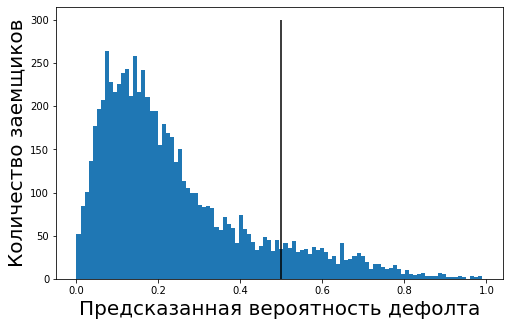

In [ ]:
# инициализируем картинку и указываем ее размер
plt.figure(figsize=(8, 5))

# строим распределение вероятностей
plt.hist(test_probabilities, bins=100)

# строим прямую линию в точке 0.5
plt.vlines(0.5, 0, 300)

# подписываем оси
plt.xlabel('Предсказанная вероятность дефолта', fontsize=20)
plt.ylabel('Количество заемщиков', fontsize=20);

Распределение сконцентрировано на отрезке от `0` до `0.3` и лишь незначительная часть вероятностей превышает порог `0.5`. Из
этого можно предположить, что классификатор склонен классифицировать все
объекты скорее как `0`, игнорируя метку `1`. Это происходит потому, что меток `1` в обучающей выборке сильно меньше, чем меток `0`.